* 회귀 및 릿지 모델
    - 타겟이 연속변수일 경우 표준화 데이터셋 Regression 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/house-standard-VALP.csv')
df.shape

(20495, 93)

In [ ]:
df

,AGEP,BDSP,ELEP,GASP,HINCP,NRC,RMSP,VALP,BATH,FESRP,...,SCHL_16,SCHL_17,SCHL_18,SCHL_19,SCHL_20,SCHL_21,SCHL_22,SCHL_23,SCHL_24,SEX_2
0,1.277527,-0.185587,-0.218278,-0.030785,-0.857357,-0.757285,-0.779457,0.401699,1.0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.115555,-0.185587,1.548888,-1.029228,0.537778,-0.757285,-0.261327,6.192561,1.0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.074056,-0.185587,1.548888,-1.029228,0.537778,-0.757285,-0.261327,6.192561,1.0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.945535,-0.185587,-0.975635,-0.243219,-0.564886,-0.757285,-0.261327,-0.578293,1.0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.987034,-0.185587,0.286627,2.093563,0.048701,-0.757285,0.256802,-0.043752,1.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20490,1.319026,-1.503998,-0.849409,-0.030785,-1.264597,-0.757285,-1.297586,-1.157379,1.0,0,...,0,1,0,0,0,0,0,0,0,1
20491,0.489046,-2.822409,-0.849409,2.093563,-1.215884,-0.757285,-1.815716,-1.273196,1.0,0,...,1,0,0,0,0,0,0,0,0,0
20492,0.489046,-0.185587,1.170210,2.730868,-0.455964,-0.757285,-0.779457,-0.043752,1.0,0,...,0,0,0,0,0,1,0,0,0,1
20493,0.945535,-0.185587,1.170210,2.730868,-0.455964,-0.757285,-0.779457,-0.043752,1.0,0,...,0,0,0,0,0,1,0,0,0,0


# 타겟변수를 제외한 입력변수를 data에 저장하기

    - VALP를 제외한 나머지를 독립변수(입력변수)로 사용
    - VALP는 종속변수(타겟변수)

In [ ]:
data = df.drop(['VALP'], axis = 1)
target = df['VALP']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size = 0.5, random_state = 42
)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape :  (10247, 92)
X_test shape :  (10248, 92)


# 타겟변수가 연속변수일 경우, Linear Regression 모델

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs = -1)
model = linr.fit(X_train, Y_train)
pred = model.predict(X_test)

print("Linear Regression Training set r2 score : {: .5f} ".format(model.score(X_train, Y_train)))
print("    Linear Regression Test set r2 score : {: .5f} ".format(r2_score(Y_test, pred)))

Linear Regression Training set r2 score :  0.34319 
    Linear Regression Test set r2 score :  0.33329 


# 타겟변수가 연속변수일 경우, 표준화 데이터셋 Ridge 모델

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, Y_train)
pred = model.predict(X_test)

print("Linear Regression Training set score : {: .5f}".format(model.score(X_train, Y_train)))
print("    Linear Regression Test set score : {: .5f}".format(r2_score(Y_test, pred)))

Linear Regression Training set score :  0.34405
    Linear Regression Test set score :  0.33379


# 그리드 서치 실행

#alpha:
#solver:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

clf_Ridge = Ridge()

params = {'alpha': [ 0.001,0.01, 1 , 10, 100, 1000],
          'solver': [ 'auto', 'svd', 'lsqr', 'cholesky', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid_Ridge = GridSearchCV(clf_Ridge, param_grid=params, scoring = 'r2', cv = 5 ,n_jobs = -1, verbose = 1)
grid_Ridge.fit(X_train,Y_train)

print("GridSearchCV max score: {: .5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter: ",grid_Ridge.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

GridSearchCV max score:  0.33140
GridSearchCV best parameter:  {'alpha': 10, 'solver': 'sag'}


In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set: {: .5f}".format(best_clf.score(X_test,Y_test)))
print("R2 Score on test set: {: .5f}".format(r2_score(Y_test,pred)))

R2 Score on test set:  0.33413
R2 Score on test set:  0.33413


In [ ]:
import seaborn as sns

<Axes: xlabel='Y_test', ylabel='pred'>

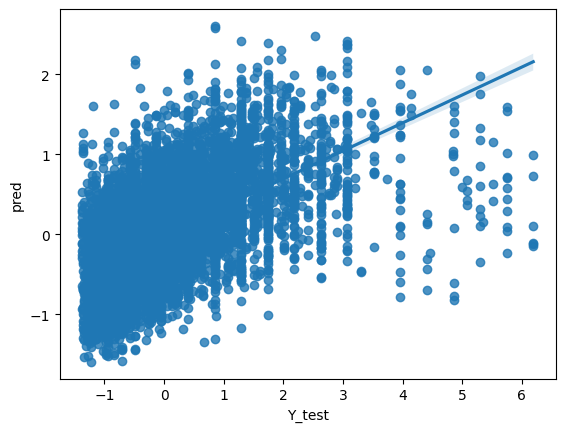

In [ ]:
import seaborn as sns

final_result = pd.concat([Y_test.reset_index(drop=True),pd.DataFrame(pred)], axis=1)
final_result.columns = ['Y_test', 'pred']

sns.regplot(x = 'Y_test', y = 'pred', data=final_result)

In [ ]:
from sklearn.linear_model import Lasso
clf_Lasso = Lasso()

model = clf_Lasso.fit(X_train,Y_train)
pred = model.predict(X_test)


print("Linear Regression Training set score: {: .5f}".format(clf_Lasso.score(X_train,Y_train)))
print("Linear Regression Test set score: {: .5f}".format(r2_score(pred,Y_test)))

Linear Regression Training set score:  0.00000
Linear Regression Test set score:  0.00000
